# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mdf = study_results.merge(mouse_metadata, how='inner')

# Display the data table for preview
mdf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
mdf['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
b128 = mdf.loc[mdf['Mouse ID'] == 'b128']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
b128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mdfUnique = mdf.drop_duplicates(subset=['Mouse ID'])
mdfUnique.reset_index(drop=True, inplace=True)
mdfUnique.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mdfUnique['Mouse ID'].count()

249

## Summary Statistics

In [7]:
# Grabbing summary statistics and cleaning the table
drugMean = mdf.groupby('Drug Regimen').mean().drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)
drugMedian = mdf.groupby('Drug Regimen').median().drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)
drugVar = mdf.groupby('Drug Regimen').var().drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)
drugSdev = mdf.groupby('Drug Regimen').std().drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)'], axis=1)
drugSEM = mdf.groupby('Drug Regimen').sem().drop(['Timepoint', 'Metastatic Sites', 'Age_months', 'Weight (g)', 'Mouse ID', 'Sex'], axis=1)

In [8]:
# Joining the tables; maybe there's a smarter way of doing this?
drugDF = drugMean.join(drugMedian, lsuffix='_mean', rsuffix='_median')
drugDF = drugDF.join(drugVar)
drugDF = drugDF.join(drugSdev, lsuffix='_var', rsuffix='_sdev')
drugDF = drugDF.join(drugSEM)
drugDF


,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_sdev,Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
drugDF.rename(columns = {'Tumor Volume (mm3)_mean': 'Mean Tumor Volume', 'Tumor Volume (mm3)_median': 'Median Tumor Volume', 'Tumor Volume (mm3)_var': 'Tumor Volume Variance',\
                         'Tumor Volume (mm3)_sdev': 'Tumor Volume Variance', 'Tumor Volume (mm3)_sdev': 'Tumor Volume Std. Dev.','Tumor Volume (mm3)': 'Tumor Volume Std. Err.'})

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.


## Bar and Pie Charts

In [12]:
mdf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [13]:
drugTP = mdf.groupby('Drug Regimen').count()
drugTP

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


Text(0, 0.5, 'Number of Mice Tested')

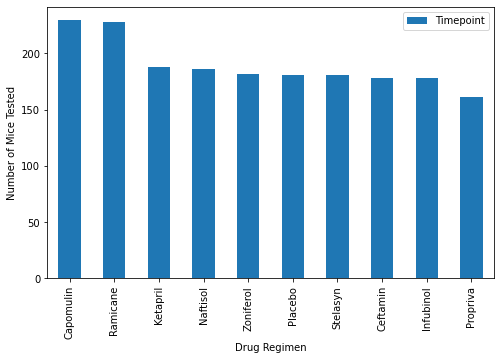

In [14]:
# Generate a bar chart using Pandas

drugTP.sort_values(by=['Timepoint'], ascending=False, inplace=True)
bar = drugTP.plot.bar(y='Timepoint', use_index=True, figsize=(8, 5))
bar.set_ylabel('Number of Mice Tested')

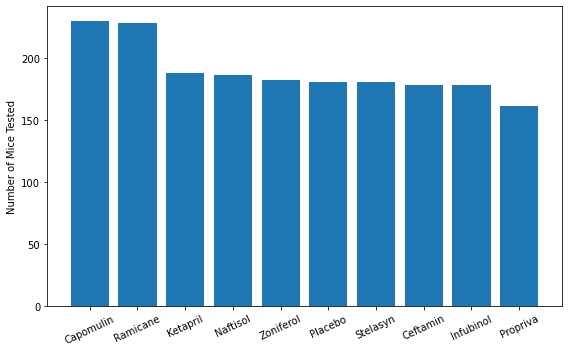

In [15]:
# Generate a bar chart using pyplot

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(drugTP.index, drugTP['Timepoint'])
ax1.set_ylabel('Number of Mice Tested')
plt.xticks(rotation=25)
fig1.tight_layout()


In [16]:
sexdf = pd.DataFrame(mdf['Sex'].value_counts())


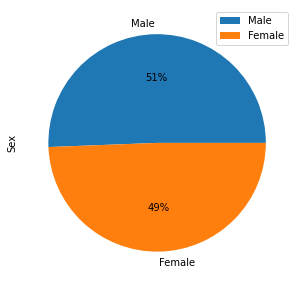

In [17]:
sexdf = pd.DataFrame(mdf['Sex'].value_counts())
ax = sexdf.plot.pie(y = 'Sex', autopct='%1.0f%%', figsize=(5,5))

([<matplotlib.patches.Wedge at 0x227bf1a3f08>,
 [Text(-0.02099250347258543, 1.0997996703027118, 'Male'),
  Text(0.020992503472585782, -1.0997996703027118, 'Female')],
 [Text(-0.01145045643959205, 0.5998907292560246, '51%'),
  Text(0.011450456439592244, -0.5998907292560246, '49%')])

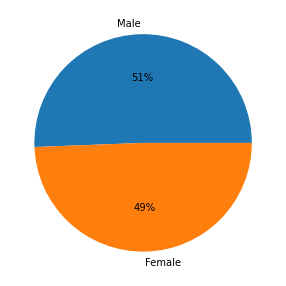

In [18]:
fig2, ax2 = plt.subplots(figsize=(5, 5))
ax2.pie(sexdf['Sex'], labels=sexdf.index, autopct='%1.0f%%', )

## Quartiles, Outliers and Boxplots

In [19]:
mdfLast = mdf.sort_values('Timepoint', ascending=False).drop_duplicates(subset=['Mouse ID'])
mdfLastTP = mdfLast.loc[(mdfLast['Drug Regimen'] == 'Capomulin') | (mdfLast['Drug Regimen'] == 'Ramicane') |\
                       (mdfLast['Drug Regimen'] == 'Infubinol') | (mdfLast['Drug Regimen'] == 'Ceftamin') ]
mdfLastTP.reset_index(inplace=True, drop=True)
mdfLastTP
# mdfLast.loc[mdfLast('Drug Regimen') == 'Capomulin' | 'Ramicane' | 'Infubinol' | 'Ceftamin']
# only_prairieville_and_jackson = df.loc[(df["POSTAL COMMUNITY"] == "PRAIRIEVILLE") | (df["POSTAL COMMUNITY"] == "JACKSON"), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,m601,45,28.430964,1,Capomulin,Male,22,17
1,a411,45,38.407618,1,Ramicane,Male,3,22
2,x401,45,28.484033,0,Capomulin,Female,16,15
3,b742,45,38.939633,0,Capomulin,Male,7,21
4,s185,45,23.343598,1,Capomulin,Female,3,17
...,...,...,...,...,...,...,...,...
95,m756,5,47.010364,1,Infubinol,Male,19,30
96,u153,0,45.000000,0,Ceftamin,Female,11,25
97,b447,0,45.000000,0,Ceftamin,Male,2,30
98,t573,0,45.000000,0,Ceftamin,Female,15,27


In [40]:
# mdAttempt = mdfLastTP.set_index('Tumor Volume (mm3)')
mdAttempt = mdfLastTP

mdAttempt1 = mdAttempt.loc[(mdAttempt['Drug Regimen'] == 'Capomulin')]
mdAttempt2 = mdAttempt.loc[(mdAttempt['Drug Regimen'] == 'Ramicane')]
mdAttempt3 = mdAttempt.loc[(mdAttempt['Drug Regimen'] == 'Infubinol')]
mdAttempt4 = mdAttempt.loc[(mdAttempt['Drug Regimen'] == 'Ceftamin')]

dfCapomulin = mdAttempt1.drop(['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
dfRamicane = mdAttempt2.drop(['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
dfInfubinol = mdAttempt3.drop(['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], axis=1)
dfCeftamin = mdAttempt4.drop(['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months', 'Weight (g)'], axis=1)

dfCapomulin.rename(columns = {'Tumor Volume (mm3)':'Capomulin'}, inplace=True)
dfCapomulin.drop(columns ='Drug Regimen', inplace = True)
dfRamicane.rename(columns = {'Tumor Volume (mm3)':'Ramicane'}, inplace=True)
dfRamicane.drop(columns ='Drug Regimen', inplace = True)
dfInfubinol.rename(columns = {'Tumor Volume (mm3)':'Infubinol'}, inplace=True)
dfInfubinol.drop(columns ='Drug Regimen', inplace = True)
dfCeftamin.rename(columns = {'Tumor Volume (mm3)':'Ceftamin'}, inplace=True)
dfCeftamin.drop(columns ='Drug Regimen', inplace = True)

dfMerge1 = dfCapomulin.join(dfRamicane, how='outer')
dfMerge2 = dfMerge1.join(dfInfubinol, how='outer')
dfMerge3 = dfMerge2.join(dfCeftamin, how='outer')
dfMerge3

,Capomulin,Ramicane,Infubinol,Ceftamin
0,28.430964,NaN,NaN,NaN
1,NaN,38.407618,NaN,NaN
2,28.484033,NaN,NaN,NaN
3,38.939633,NaN,NaN,NaN
4,23.343598,NaN,NaN,NaN
...,...,...,...,...
95,NaN,NaN,47.010364,NaN
96,NaN,NaN,NaN,45.0
97,NaN,NaN,NaN,45.0
98,NaN,NaN,NaN,45.0


In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [53]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumData = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumData = dfMerge3[drug]
    
    # Determine outliers using upper and lower bounds
    quartiles = tumData.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'The IQR for {drug} is {iqr:.2f}. Anything below {lowerq:.2f} or above {upperq:.2f} may be an outlier.')

The IQR for Capomulin is 7.78. Anything below 32.38 or above 40.16 may be an outlier.
The IQR for Ramicane is 9.10. Anything below 31.56 or above 40.66 may be an outlier.
The IQR for Infubinol is 11.48. Anything below 54.05 or above 65.53 may be an outlier.
The IQR for Ceftamin is 15.58. Anything below 48.72 or above 64.30 may be an outlier.


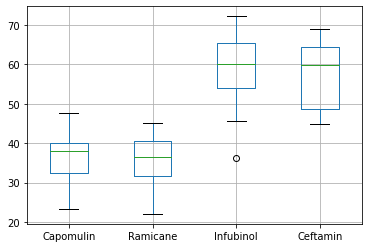

In [52]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = dfMerge3.boxplot()


## Line and Scatter Plots

In [54]:
b128

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


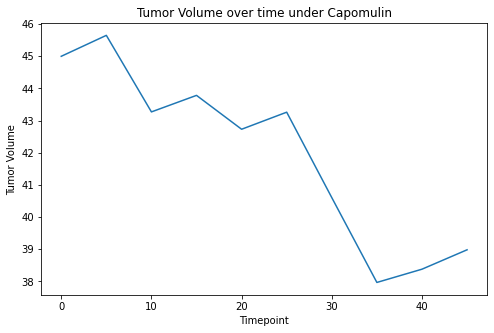

In [55]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
figb128, ax128 = plt.subplots(figsize=(8, 5))
ax128.set_ylabel('Tumor Volume')
ax128.set_xlabel('Timepoint')
ax128.set_title('Tumor Volume over time under Capomulin')
plt.plot(b128['Timepoint'], b128['Tumor Volume (mm3)'])

In [56]:
mdtry

NameError: name 'mdtry' is not defined

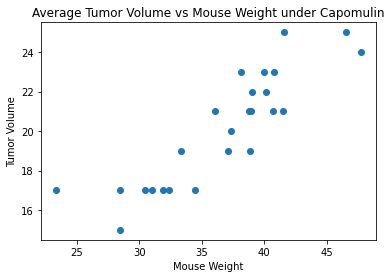

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capoData = mdfLastTP.loc[mdfLastTP['Drug Regimen'] == 'Capomulin', :]
capoData.drop(['Mouse ID', 'Timepoint', 'Metastatic Sites', 'Sex', 'Age_months',], axis=1)

x_values = capoData['Tumor Volume (mm3)']
y_values = capoData['Weight (g)']
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Average Tumor Volume vs Mouse Weight under Capomulin')
plt.show()

## Correlation and Regression

0     16.503388
2     16.526690
3     21.117641
4     14.269575
5     18.236210
19    22.234413
20    21.653151
21    18.024956
22    22.277669
23    20.402896
24    19.844901
26    21.872214
29    20.760016
32    17.641931
33    21.903150
57    24.958070
58    21.076913
59    18.654110
60    20.298471
61    19.148614
62    21.136630
66    21.035809
83    17.405727
86    24.454540
88    21.562314
Name: Tumor Volume (mm3), dtype: float64
y = 0.44x +4.02
The r-value is: 0.7686134812139


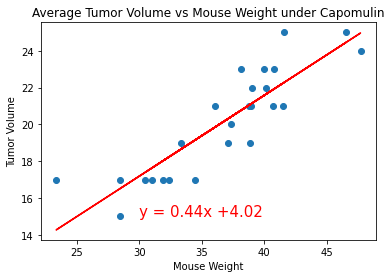

In [59]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# # Create Plot, label axis and annotate line equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.title('Average Tumor Volume vs Mouse Weight under Capomulin')
plt.annotate(line_eq,(30,15),fontsize=15,color="red")
# # Print r value, show value
print(f"The r-value is: {rvalue**2}")
plt.show()
